<font size=14>[**Pandas**](https://pandas.pydata.org/)：**表格利器** </font>

<div align='center'><img src="pics/库层.png" width=80%></div>

<div align=center><img src="pics/pandas/image11.png" width=40%><img src="pics/pandas/image10.png" width=50%></div>
<center>地面观测填图</center>

<div align=center><img src="pics/pandas/image13.png" width=40%><img src="pics/pandas/image12.png" width=40%></div>
<center>离散点单要素填图</center>

<div align=center><img src="pics/pandas/image14.png" width=30%><img src="pics/pandas/image15.png" width=10%></div>
<center>要素时间序列</center>

<div align=center><img src="pics/pandas/image17.png" width=30%><img src="pics/pandas/image18.png" width=40%></div>
<center>探空图</center>

<div align=center><img src="pics/pandas/image16.png" width=40%><img src="pics/pandas/image19.png" width=30%></div>
<center>模式高空图</center>

<div align=center><img src="pics/pandas/image20.png" width=40%><img src="pics/pandas/image23.png" width=30%></div>
<center>卫星通道图像产品</center>

<div align=center><img src="pics/pandas/image21.jpeg" width=40%><img src="pics/pandas/雷达探测扫描.png" width=30%></div>
<center>雷达PPI扫描</center>

<font size=5>“天气学分析方法除了具有一般自然科学的共性之外，它的**独特之处**乃是<font color='red'>用一组二维（平面）的天气图作为主要工具，刻划三维空间发生的一切天气现象和天气过程</font>。通过天气分析指出天气现象和天气过程的物理本质及其演变规律，并利用其规律作出未来天气演变趋势的判断。”
——《大气科学辞典》

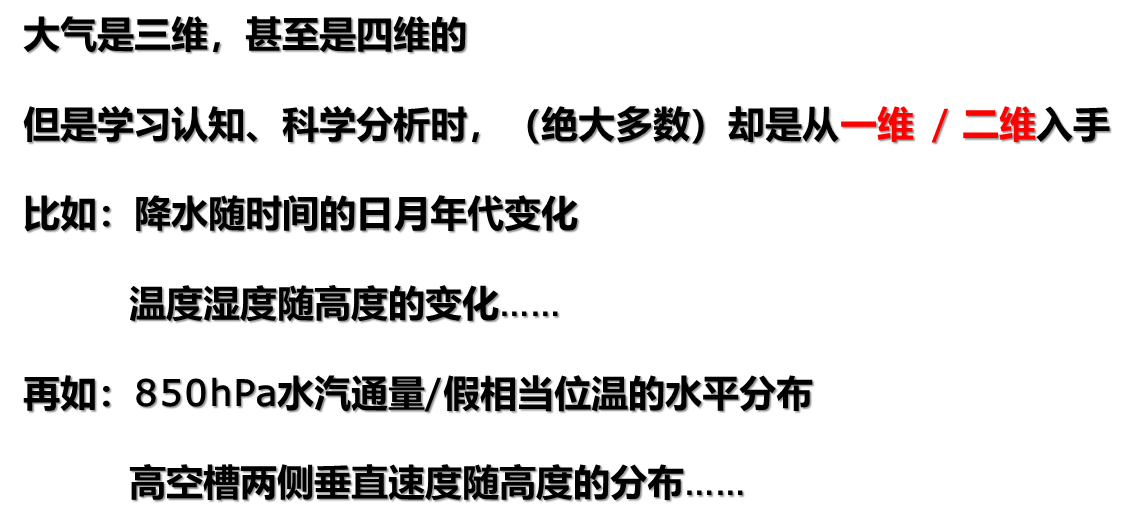

<center><font size=14>“万数皆表”</font></center>

---

<img src='pics/pandas/image24.png' align=left width=30%>   

   * **快速、灵活和富有表现力的数据结构**
   * **旨在使处理“关系” ralational或“标签”labeled数据既简单又直观**
   * **我是EXCEL $^+$ 、 SPSS$^-$ 、 SQL$_{mini}$**

0. 核心数据结构：Series与Dataframe
1. 创建、输入、输出
2. 索引、切片、筛选、重置
3. 合并、拼接、追加、删除_去重
4. 排序、分组、汇总
5. *计算、统计*

In [ ]:
import pandas as pd
pd.__version__

# Series & Dataframe

## Series
Series是一个一维的标记数组，可以保存任何数据类型（整数、字符串、浮点数、Python对象等）。轴标签axis labels统称为索引index 。

In [ ]:
# Series可以由列表创建，可以不需要索引，默认生成索引为0开始的整数
#s = pd.Series([ 3, -5, 7, 4]) #pd.Series(list)
s = pd.Series([ 3, -5, 7, 4],index=[ 'a', 'b', 'c', 'd']) #pd.Series(data, index=index)
s

In [ ]:
# 由字典创建，字典的键为索引，值为序列
s1= pd.Series({'b': 'bb', 'a': 'aa', 'c': 'cc'})
s1

In [ ]:
# Series中可以有相同的元素
s2= pd.Series(5.,index=[ 'a', 'b', 'c', 'd']) 
s2

In [ ]:
import numpy as np
s3= pd.Series(np.random.randn(5)) 
s3

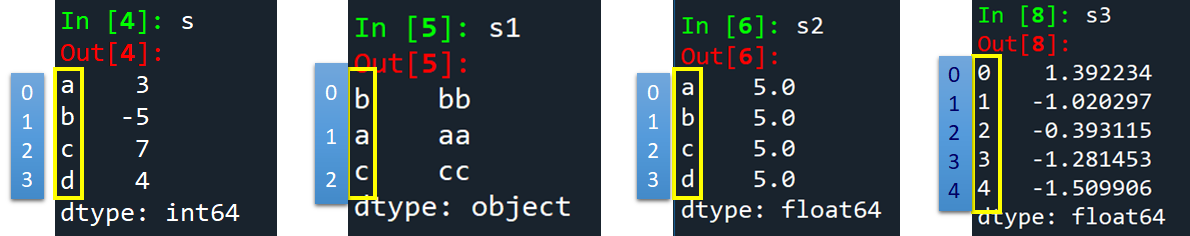

### Series很像字典

In [ ]:
# Series is dict-like 使用key值 / *标签* 访问数据
s['a']
# s.a

### Series也像ndarray

In [ ]:
# Series is ndarray-like  使用位置索引访问数据
s[0]         # ╮如果是数字标签，就是label
# s[[0,2]]     # ╯如果是其他标签，位置|就是顺序
# s[1:3]       #  永远是位置|顺序

In [ ]:
# 修改标签，仍然为“数字”
s3.index=[4,3,2,1,0]
s3[4]

In [ ]:
s3[[0,2]]

In [ ]:
s3[0:2]

### 第一次认识“标记labeled”数据

In [ ]:
# 如何理解标记数组
s + s

In [ ]:
s[1:]  -  s[:-1][::-1]  

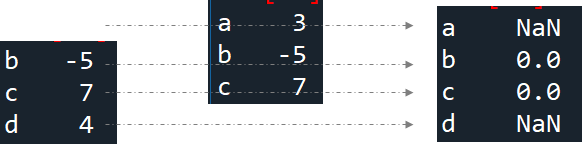

In [ ]:
s[1:].reset_index(drop=True)-s[:-1].reset_index(drop=True)

In [ ]:
s.values[1:] - s.values[:-1]       #pd.Series()

## Dataframe
DataFrame是一种二维标记数据结构，其中包含可能不同类型的列。<br/>
你可以把它想象成一个电子表格或SQL表，或者一系列对象的dict。

### 可由以下数据创建
    - 一维数组、列表、字典、序列的字典
    - 二维ndarray
    - 结构化ndarray
    - 序列
    - 其他dataframe

In [ ]:
data = {'Time': pd.Timestamp('20201002'),
        'Stid': [ 54511, 54602, 53798, 53772], 
        'Name': ['Beijing','Baoding','Xingtai','Taiyuan'], 
        'Lon' : [ 110, 111, 112, 113],
        'Lat' : [ 35, 39, 40, 41],
        'Rain': [9999, 0.01, 50.,np.nan],
        'T': [30, 31, 32., 33],
        'Td': [20, 21, 22., 23.]}
df = pd.DataFrame(data)
df
#dates = pd.date_range("20130101", periods=6)

所有信息

In [ ]:
df.info()

快速统计

In [ ]:
df.describe()

---
索引信息

In [ ]:
df.index

列名信息

In [ ]:
df.columns

数据类型

In [ ]:
df.dtypes

改变数据类型

In [ ]:
df['Lon']=df['Lon'].astype('float32')
df

转换为ndarray数组

In [ ]:
df.to_numpy()

<font color='red'>请注意，当Dataframe具有不同数据类型的列时，这可能是一个“昂贵的”操作，这归结为pandas和NumPy之间的根本区别——
    
* NumPy数组对整个数组有一个数据类型
    
* 而pandas数据帧对每列有一个数据类型    

### 索引切片
    
|<font size=6>操作    | <font size=6>语法   |<font size=6>结果          |
| ------------------ | -------------------- | ------------------------ |
|<font size=5> <mark>`选择列`</mark><br><font size=2>Select Column |<font size=5> df[col] |<font size=5>Series|
|<font size=5> <mark>`依据标签选行`</mark><br><font size=2>Select row by label |<font size=5> df.loc[label]|<font size=5>Series|
|<font size=5> <mark>`依据行号选行`</mark><br><font size=2>Select row by integer location |<font size=5> df.iloc[loc]|<font size=5>Series|
|<font size=5> <mark>`行切片`</mark><br><font size=2>Slice rows|<font size=5> df[5:10]|<font size=5>Dataframe|


In [ ]:
df.head()  #头5个

In [ ]:
df.tail(3)  #末3个

In [ ]:
df[0:2] #按照整数位置/行号筛选

In [ ]:
df.loc[2] #按照标签选择行，index=[5,7,6,1]

In [ ]:
df.loc[1:3] #按照标签选择行，index=[5,7,6,1]

In [ ]:
df.iloc[0] #按照整数位置/行号筛选    iloc means index locate

In [ ]:
df.iloc[[0,1]]

In [ ]:
df.iloc[[0],[1]] 

In [ ]:
df.iloc[[0,1],[0,1]] 

In [ ]:
df.iloc[0:2,[0,1]] 

In [ ]:
df.iloc[:, [5,1]]

In [ ]:
df['Rain'] #按照列名进行索引，得到

In [ ]:
df.Rain

In [ ]:
df[['Rain','Time']]

In [ ]:
df[df.columns[5]] 

In [ ]:
df[::-1]  

In [ ]:
df[::2] 

### 筛选重置

In [ ]:
df1=df[df['Rain']<999]
df1

In [ ]:
df1=df[(df['Lat']>40)&(df['Rain']<999)]
df1

In [ ]:
whitelist = [ 54511, 53798, 53772] #高空站点
df2 = df[df.Stid.isin(whitelist)]
df2

In [ ]:
df.query('Stid == [54602,53798]') #河北的

In [ ]:
df['NoTlogP'] = df['Stid'].where(df['Stid'] == 54602)
df

In [ ]:
df['flag'] = df['Rain']<999
df

In [ ]:
df['T-Td'] = df['T'] -df['Td']
df

In [ ]:
nameCN=pd.Series(['北京', '保定', '邢台', '太原'])
df.insert(1, '站点中文', nameCN )#,allow_duplicates=True) #允许重复出现已有的同名列
df

### 删除

In [ ]:
df

In [ ]:
df

In [ ]:
df.drop('flag',axis=1)  #axis=0为行，axis=1为列

In [ ]:
df.pop('level')#删除level列
df

In [ ]:
df

In [ ]:
del df['T-Td']
df

In [ ]:
df.sum(0, skipna=False)
df.mean(axis=None, skipna=None, level=None, numeric_only=None, **kwargs) #axis=0-按列平均 1-按行平均
df.median(axis=None, skipna=None, level=None, numeric_only=None, **kwargs)
df.max(axis=None, skipna=None, level=None, numeric_only=None, **kwargs)
df.idxmax(axis=0, skipna=True)#请求轴上最大值第一次出现的返回索引值
df.T

### 缺测值处理

In [ ]:
df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
# 去除缺测值。any有NA就删除整行/列，all整行/列全为NA时才drop

In [ ]:
df.fillna(value=5)

In [ ]:
pd.isna(df)

---
用个例说话——
* 排序、分组、汇总
* 合并、拼接、追加、删除_去重
* *计算、统计*

***
# 大家好，我是甲方，我有几个小需求
<div align='left'><img src='pics/pandas/甲方.jfif' width=400></div>

## **需求1：读取MICAPS第1类数据，为后续绘制地面天气填图、对地面气象要素进行客观分析做准备。<br/>**
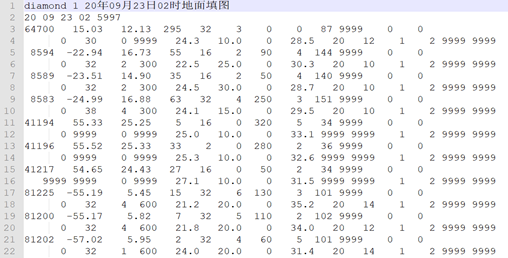

     理需求、建思路；看数据、找工具；模块化
1. 读取
2. 筛选、合并

In [ ]:
import pandas as pd
a=r"data/pandas/Surf20092308.000"
#a=sys.argv[1]
#a=r'x:\surface\plot\19112420.000'
year='20'+a[-12:-10]
month=a[-10:-8]
day=a[-8:-6]
valid=a[-6:-4]

>读入所有数据

In [ ]:
df=pd.read_csv(a,skiprows=3,header=None,encoding="GB2312",sep='\s+').drop([0])
df

```python
pandas.read_csv(数据路径或buffer缓存,
sep='\s+', \r  \t  \s            # 分隔符，\s空格；\s+一个或多个空格；\t制表符TAB；\r回车
delimiter=None,                  #
header='infer',                  # 表头
names=None,                      #
index_col=None,                  #
usecols=None,   [1,2,3]          # 使用 哪些列
……
dtype=None,                      # 类型 
engine=None,                     #
……
skiprows=None, [1,2,3]           # 跳过行
skipfooter=0,                    #
……
skip_blank_lines=True            # 跳过空行
…… 
encoding=None……)                 # 编码：ANSI、GB2312、UTF-8
```

>奇偶行分离

In [ ]:
df1 = df.iloc[::2].reset_index(drop=True)
df2 = df.iloc[1::2].reset_index(drop=True)
df1 = df1.drop(columns=[12,13])

In [ ]:
sur = pd.concat([df1,df2],axis=1,ignore_index=True)  #右侧拼接

` pd.concat([df1,df2,df3])默认拼接沿着axis=0也就是行轴去拼接`<br/>
<img src='pics/pandas/merging_concat_basic.png'><br/>
` pd.concat(axis=1)沿着axis=1列轴去拼接`<br/>
<img src='pics/pandas/merging_concat_axis1.png'><br/>
`result = df1.append(df2)`<br/>
<img src='pics/pandas/merging_append1.png'><br/>
`还有很多可以根据实际需要，按照轴、键key、索引index……进行多样拼接`<br/>

In [ ]:
sur.columns= ["stid","lon","lat","h","lev","cloud_fraction","wind_dir",
              "wind_speed","slp","p3","w1","w2","r6","lc","lcc","lch",
              "dew_point_temperature","vv","weather","air_temperature","mc","hc","s1","s2","T24","P24"]
sur[['stid','cloud_fraction','weather','w1','w2','lcc','lc','lch','mc','hc','p3','r6']] = sur[['stid','cloud_fraction','weather','w1','w2','lcc','lc','lch','mc','hc','p3','r6']].astype('int')
sur = sur[sur['stid']<80000]
sur['weather'] = sur['weather'].replace(9999,0)
sur['wind_speed'] = sur['wind_speed'].replace(9999,0)
sur['weather'] = sur['weather'].astype('int')
sur['cloud_fraction'] = sur['cloud_fraction'].replace(9999,10)
sur

---
## **需求2：读取MICAPS第4类数据，为后续绘制分析涡度做数据准备。<br/>**
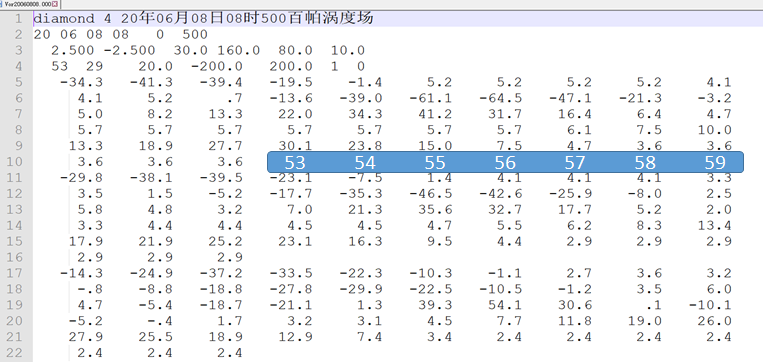

     理需求、建思路；看数据、找工具；模块化
1. 读取
2. 筛选、合并
3. 变形

In [ ]:
import numpy as np
import pandas as pd
fileName='data/pandas/Vor20060808.000'
df=pd.read_csv(fileName, skiprows=4, header=None, encoding="GB2312", sep='\s+')
vor=df.values.reshape(29,60)
vor=np.delete(vor,list(range(53,60)),axis=1)
vor[0]

---
## **需求3：每日降水，计算过程降水量，供后续绘制降水落区图使用。<br/>**
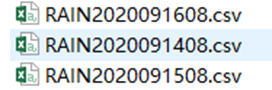
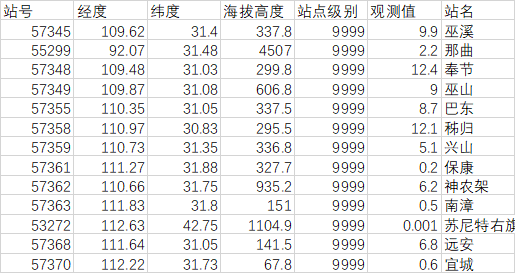

     理需求、建思路；看数据、找工具；模块化
1. 文件遍历
2. 读取→追加
3. 分组→求和

In [ ]:
import glob
import pandas as pd
pattern='data/pandas/RAIN*.csv'
dfRain = pd.DataFrame(columns=['站号','观测值','站名'])

In [ ]:
for filename in glob.glob(pattern):                   #通配符遍历，循环打开，还不用想着关闭
    df=pd.read_csv(filename,encoding='gbk',header=0)  #读取
    dfRain=dfRain.append(df, ignore_index=True)       #追加

In [ ]:
cumulative=dfRain.groupby('站号').sum().sort_values(by='站号') #分组→求和→排序
cumulative    #可以与‘雨量累加.xlsx’进行对比校验

---
## **需求4：时间序列，去重。<br/>**
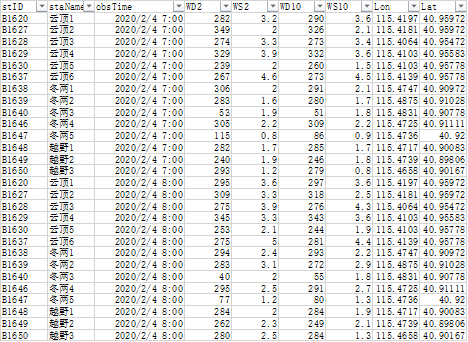
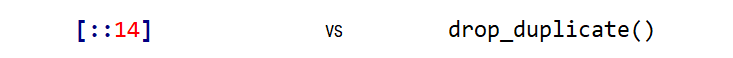

In [ ]:
import pandas as pd
df=pd.read_excel('data/pandas/timeSeries.xlsx',sheet_name='DataAll')
   
# dftime=df['obsTime'][::14].reset_index(drop=True)            #但不是每个站都有观测|记录
dftime =df['obsTime'].drop_duplicates().reset_index(drop=True) #去重

In [ ]:
dftime

---
## **需求5：从逐5分钟自动站观测文件中，提取研究所需十个站点的风向风速，按照如下格式保存成表格，便于其他程序调用读取分析。<br/>**

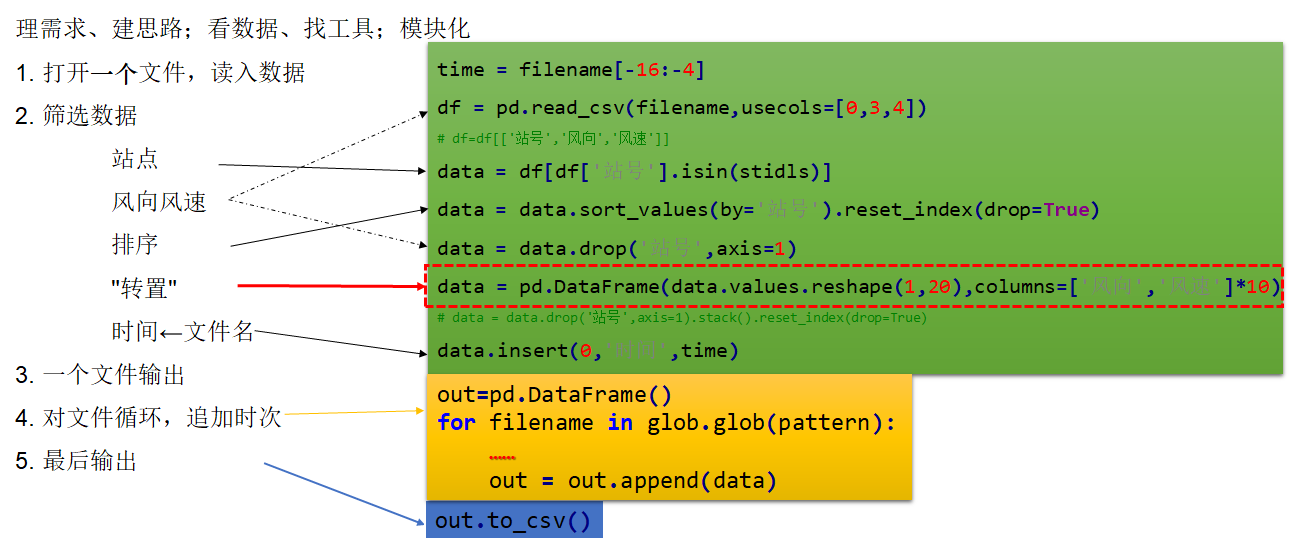

In [ ]:
# 需求站点列表：从txt文件中读取需要站点站号，列表
with open('data/pandas/站点信息.txt') as f:
    lines=f.read().split(sep='\n')
    stidls=[int(line) for line in lines]  #s=list(map(int, lines))
stidls

In [ ]:
# 获得原始数据文件列表，用于遍历
import glob
pattern='data/pandas/2019*.csv'
# files =[]
# for file in glob.glob(pattern):
#     files.append(file)
# files

In [ ]:
# 主循环：（读取数据→筛选站点→重塑一行→插入时间）*循环追加 → 输出
import pandas as pd
out=pd.DataFrame()#输出结果的dataframe
# for filename in files:
for filename in glob.glob(pattern):   #！！！不出意外的话，这是最好的一条“抓取”语句
    import chardet
    with open(filename, 'rb') as f:
        coding=str(chardet.detect(f.readline())['encoding'])
    time = filename[-16:-4]
    df = pd.read_csv(filename,usecols=[0,3,4],encoding=coding)  # df = df[['站号','风向','风速']]
    data = df[df['站号'].isin(stidls)].sort_values(by='站号').reset_index(drop=True) #如果缺测……
    data = pd.DataFrame(data.drop('站号',axis=1).values.reshape(1,20),columns=['风向','风速']*10) # data = data.drop('站号',axis=1).stack().reset_index(drop=True)
    data.insert(0,'时间',time) 
    out = out.append(data)#追加到out当中，最后再输出
out.to_csv('data/pandas/result.csv',index=False,header=True,encoding='gbk')

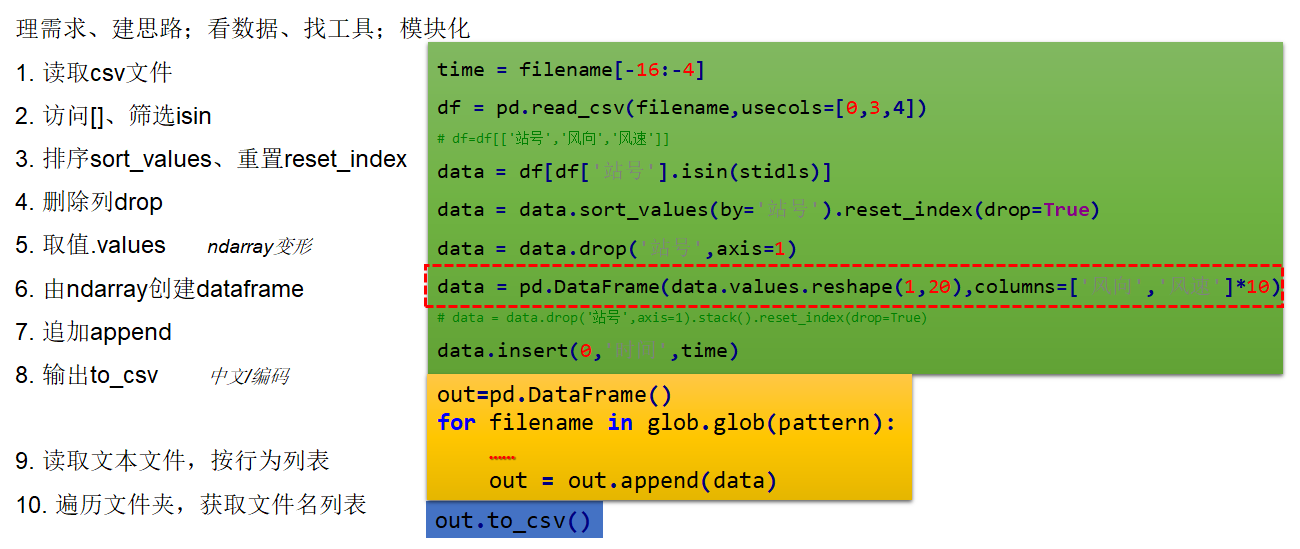

---
## *需求6：json数据解析。<br/>*
pandas不但支持纯表格excel表格（xls、xlsx、csv）、文本型类表格存储（以tab|空格区分数值），也支持一些其他格式化数据，如json、xml、html的解析。

<table class="colwidths-given table">
<colgroup>
<col style="width: 12%">
<col style="width: 40%">
<col style="width: 24%">
<col style="width: 24%">
</colgroup>
<thead>
<tr class="row-odd"><th class="head"><p>格式类型</p></th>
<th class="head"><p>数据描述</p></th>
<th class="head"><p>读取工具</p></th>
<th class="head"><p>写入工具</p></th>
</tr>
</thead>
<tbody>
<tr class="row-even"><td><p>text</p></td>
<td><p><a class="reference external" href="https://en.wikipedia.org/wiki/Comma-separated_values">CSV</a></p></td>
<td><p><a class="reference internal" href="#io-read-csv-table"><span class="std std-ref">read_csv</span></a></p></td>
<td><p><a class="reference internal" href="#io-store-in-csv"><span class="std std-ref">to_csv</span></a></p></td>
</tr>
<tr class="row-odd"><td><p>text</p></td>
<td><p>Fixed-Width Text File</p></td>
<td><p><a class="reference internal" href="#io-fwf-reader"><span class="std std-ref">read_fwf</span></a></p></td>
<td></td>
</tr>
<tr class="row-even"><td><p>text</p></td>
<td><p><a class="reference external" href="https://www.json.org/">JSON</a></p></td>
<td><p><a class="reference internal" href="#io-json-reader"><span class="std std-ref">read_json</span></a></p></td>
<td><p><a class="reference internal" href="#io-json-writer"><span class="std std-ref">to_json</span></a></p></td>
</tr>
<tr class="row-odd"><td><p>text</p></td>
<td><p><a class="reference external" href="https://en.wikipedia.org/wiki/HTML">HTML</a></p></td>
<td><p><a class="reference internal" href="#io-read-html"><span class="std std-ref">read_html</span></a></p></td>
<td><p><a class="reference internal" href="#io-html"><span class="std std-ref">to_html</span></a></p></td>
</tr>
<tr class="row-even"><td><p>text</p></td>
<td><p>Local clipboard</p></td>
<td><p><a class="reference internal" href="#io-clipboard"><span class="std std-ref">read_clipboard</span></a></p></td>
<td><p><a class="reference internal" href="#io-clipboard"><span class="std std-ref">to_clipboard</span></a></p></td>
</tr>
<tr class="row-odd"><td><p>binary</p></td>
<td><p><a class="reference external" href="https://en.wikipedia.org/wiki/Microsoft_Excel">MS Excel</a></p></td>
<td><p><a class="reference internal" href="#io-excel-reader"><span class="std std-ref">read_excel</span></a></p></td>
<td><p><a class="reference internal" href="#io-excel-writer"><span class="std std-ref">to_excel</span></a></p></td>
</tr>
<tr class="row-even"><td><p>binary</p></td>
<td><p><a class="reference external" href="http://www.opendocumentformat.org">OpenDocument</a></p></td>
<td><p><a class="reference internal" href="#io-ods"><span class="std std-ref">read_excel</span></a></p></td>
<td></td>
</tr>
<tr class="row-odd"><td><p>binary</p></td>
<td><p><a class="reference external" href="https://support.hdfgroup.org/HDF5/whatishdf5.html">HDF5 Format</a></p></td>
<td><p><a class="reference internal" href="#io-hdf5"><span class="std std-ref">read_hdf</span></a></p></td>
<td><p><a class="reference internal" href="#io-hdf5"><span class="std std-ref">to_hdf</span></a></p></td>
</tr>
<tr class="row-even"><td><p>binary</p></td>
<td><p><a class="reference external" href="https://github.com/wesm/feather">Feather Format</a></p></td>
<td><p><a class="reference internal" href="#io-feather"><span class="std std-ref">read_feather</span></a></p></td>
<td><p><a class="reference internal" href="#io-feather"><span class="std std-ref">to_feather</span></a></p></td>
</tr>
<tr class="row-odd"><td><p>binary</p></td>
<td><p><a class="reference external" href="https://parquet.apache.org/">Parquet Format</a></p></td>
<td><p><a class="reference internal" href="#io-parquet"><span class="std std-ref">read_parquet</span></a></p></td>
<td><p><a class="reference internal" href="#io-parquet"><span class="std std-ref">to_parquet</span></a></p></td>
</tr>
<tr class="row-even"><td><p>binary</p></td>
<td><p><a class="reference external" href="https://orc.apache.org/">ORC Format</a></p></td>
<td><p><a class="reference internal" href="#io-orc"><span class="std std-ref">read_orc</span></a></p></td>
<td></td>
</tr>
<tr class="row-odd"><td><p>binary</p></td>
<td><p><a class="reference external" href="https://msgpack.org/index.html">Msgpack</a></p></td>
<td><p><a class="reference internal" href="#io-msgpack"><span class="std std-ref">read_msgpack</span></a></p></td>
<td><p><a class="reference internal" href="#io-msgpack"><span class="std std-ref">to_msgpack</span></a></p></td>
</tr>
<tr class="row-even"><td><p>binary</p></td>
<td><p><a class="reference external" href="https://en.wikipedia.org/wiki/Stata">Stata</a></p></td>
<td><p><a class="reference internal" href="#io-stata-reader"><span class="std std-ref">read_stata</span></a></p></td>
<td><p><a class="reference internal" href="#io-stata-writer"><span class="std std-ref">to_stata</span></a></p></td>
</tr>
<tr class="row-odd"><td><p>binary</p></td>
<td><p><a class="reference external" href="https://en.wikipedia.org/wiki/SAS_(software)">SAS</a></p></td>
<td><p><a class="reference internal" href="#io-sas-reader"><span class="std std-ref">read_sas</span></a></p></td>
<td></td>
</tr>
<tr class="row-even"><td><p>binary</p></td>
<td><p><a class="reference external" href="https://en.wikipedia.org/wiki/SPSS">SPSS</a></p></td>
<td><p><a class="reference internal" href="#io-spss-reader"><span class="std std-ref">read_spss</span></a></p></td>
<td></td>
</tr>
<tr class="row-odd"><td><p>binary</p></td>
<td><p><a class="reference external" href="https://docs.python.org/3/library/pickle.html">Python Pickle Format</a></p></td>
<td><p><a class="reference internal" href="#io-pickle"><span class="std std-ref">read_pickle</span></a></p></td>
<td><p><a class="reference internal" href="#io-pickle"><span class="std std-ref">to_pickle</span></a></p></td>
</tr>
<tr class="row-even"><td><p>SQL</p></td>
<td><p><a class="reference external" href="https://en.wikipedia.org/wiki/SQL">SQL</a></p></td>
<td><p><a class="reference internal" href="#io-sql"><span class="std std-ref">read_sql</span></a></p></td>
<td><p><a class="reference internal" href="#io-sql"><span class="std std-ref">to_sql</span></a></p></td>
</tr>
<tr class="row-odd"><td><p>SQL</p></td>
<td><p><a class="reference external" href="https://en.wikipedia.org/wiki/BigQuery">Google BigQuery</a></p></td>
<td><p><a class="reference internal" href="#io-bigquery"><span class="std std-ref">read_gbq</span></a></p></td>
<td><p><a class="reference internal" href="#io-bigquery"><span class="std std-ref">to_gbq</span></a></p></td>
</tr>
</tbody>
</table>

In [ ]:
#引用部分
import json
# from pandas.io.json import json_normalize
import numpy as np
import pandas as pd
from scipy.interpolate import Rbf
import sys
from scipy import interpolate
# a=sys.argv[1]
# a='2019121614'

#读取配置文件
# with open('setDir.ini','r')as fset:
#     path=fset.readline().strip('\n').replace('\\','/')
#读取json数据
with open('data/pandas/DM.json', 'r',encoding='utf-8') as fdm:
    ddm = json.load(fdm)
    dfdm = pd.json_normalize(ddm['DS'])
dfdm=dfdm.astype('float64')
dfdm['Station_Id_d']=dfdm['Station_Id_d'].astype(int)    #把站号弄成整型数据
df=dfdm.replace([999999,999999.0,999998,999998.0,999990,999990.0],[99999,99999,99999,99999,0.01,0.01])
# ……
# ……
df

---
# 总结
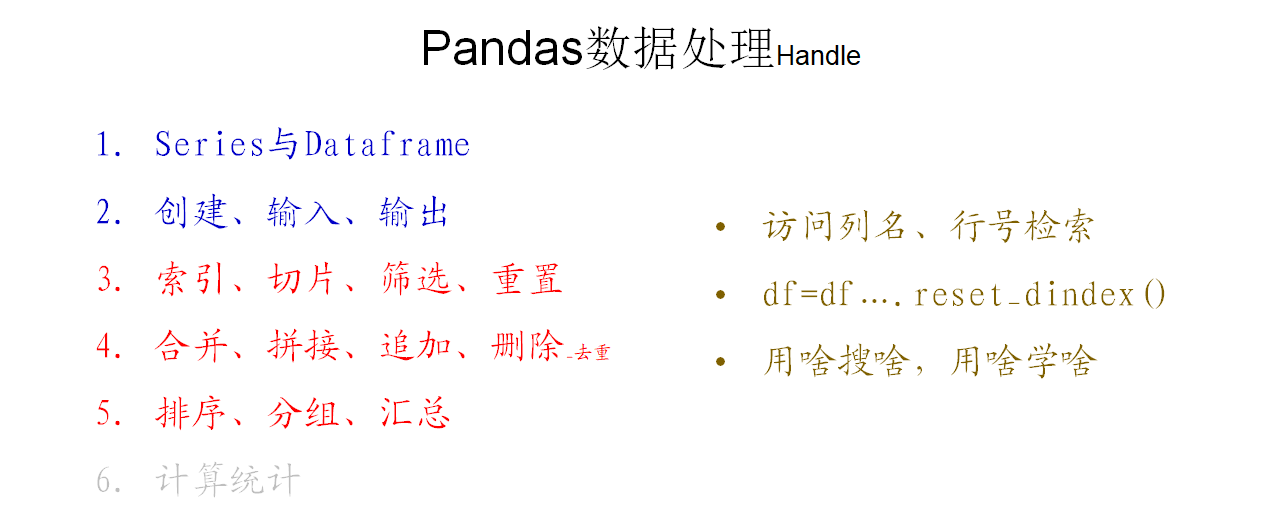

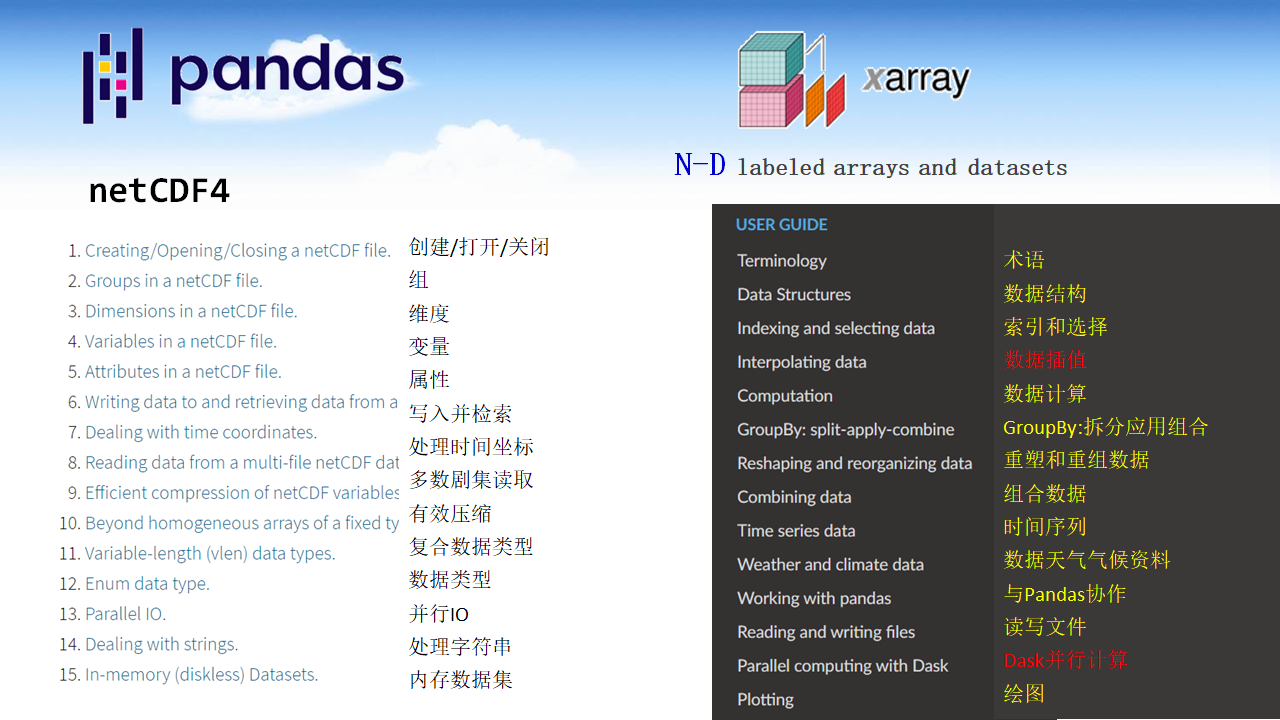

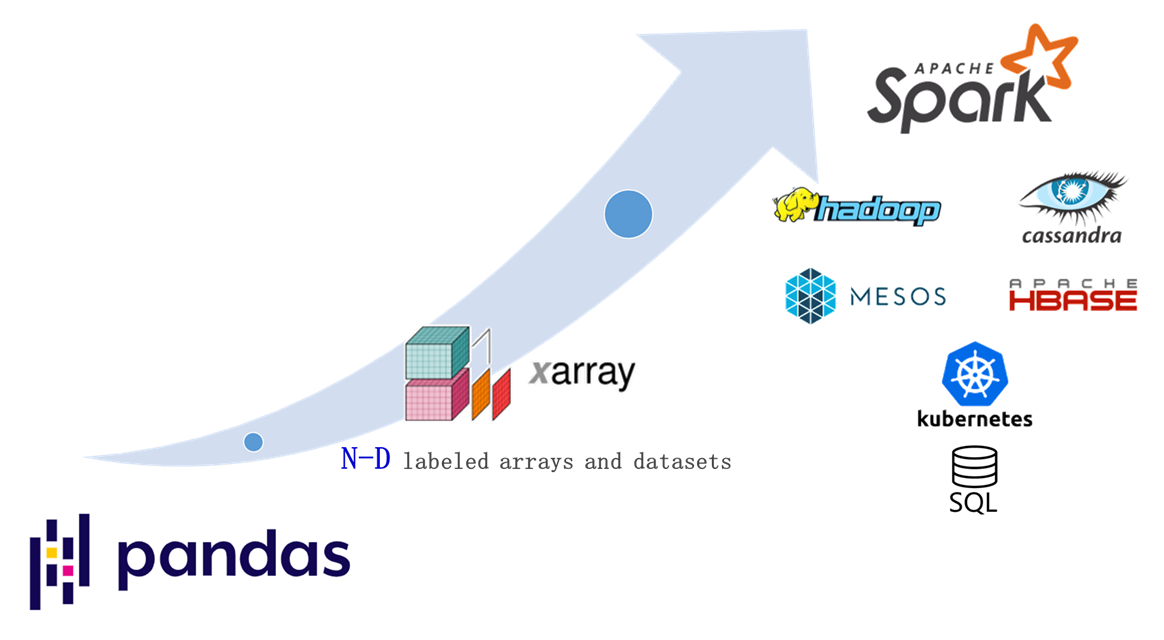